### 專題 1 . $\pi$ 的估計

- 使用到蒙地卡羅法

- 假設圓半徑為 1 ，所畫圓形面積的$\frac{1}{4}$ 為 $\frac{1}{4}\pi$ ， 相對應的正方形面積為1

- 此時需統計落在圓內&圓外的點的比例，假設總共有 n 點 ，落在圓內的點有c點，那此時 $\frac{1}{4}\pi$ : 1 = c : n

- 承上，可推得 $ \pi = 4\times c \div n$ ， 此時可得到接近3.14之數字 ， 當 n 越大，代表樣本取越多，數值將更為趨近平均值

- 可使用 mpatches 模組簡易畫正方形 ( 圓也可以 )  ( 設定 : 左下角座標 , 長 , 寬 )

3.1528


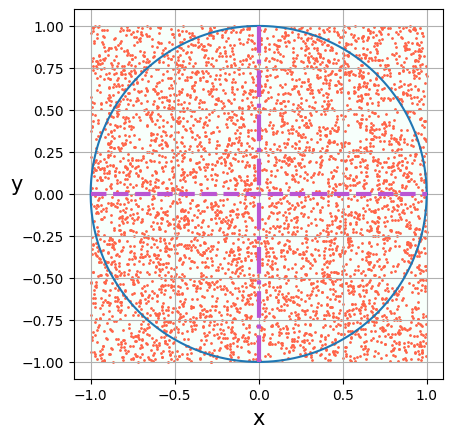

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform
import matplotlib.patches as mpatches

r = 1
theta = np.linspace(0, 2*np.pi, 200)
r_y = r*np.sin(theta)
r_x = r*np.cos(theta)
loc = -1
scale = 2
size = 5000
x = uniform.rvs(loc=loc, scale=scale, size=size)
y = uniform.rvs(loc=loc, scale=scale, size=size)

x_left = -1
x_right = 1
x_line = np.linspace(x_left, x_right, 200)

rec_loc = np.array([-1, -1])
rectangle = mpatches.Rectangle(rec_loc, 2, 2, alpha=0.8, color="mintcream")

sum = np.sqrt(x**2+y**2)
dot_in_circle = (sum <= 1).sum()
pi = 4*dot_in_circle/size

print(pi)

ax = plt.gca()
ax.grid(True)
ax.plot(r_x, r_y)
ax.add_patch(rectangle)
ax.scatter(x, y, color="tomato", s=1)
ax.plot(x_line, 0*x_line, color="mediumorchid", lw=3, linestyle="--")
ax.plot(0*x_line, x_line, color="mediumorchid", lw=3, linestyle="-.")
ax.set_xlabel("x", fontsize=15)
ax.set_ylabel("y", fontsize=15, rotation=0)
ax.set_aspect(1)


### 專題3 以蒙地卡羅實驗驗證 J-B 檢定統計量


Power ( 顯著水準 ) = 0.04932


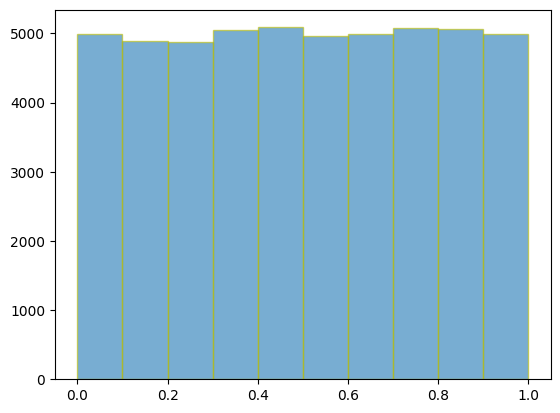

In [14]:
import numpy as np 
from scipy.stats import norm, ttest_ind
import matplotlib.pyplot as plt 

# 雙檢定t檢定 ( 產生兩組資料均來自常態)
n=10  # 樣本數
N=10000*5  # 實驗次數
p_val=np.zeros(N)
alfa=0.05

# 迴圈作法
# for i in range(N): 
    # x1=norm.rvs(loc=0,scale=1,size=n)
    # x2=norm.rvs(loc=0,scale=1,size=n)
    # s,p_val[i] = ttest_ind(x1,x2)
    
#  broadcasting
x1=norm.rvs(loc=0,scale=1,size=(n,N))
x2=norm.rvs(loc=0,scale=1,size=(n,N))
s,p_val= ttest_ind(x1,x2)
    

    
plt.hist(p_val,bins=10,alpha=0.6,edgecolor="y",lw=1)
power=(p_val<=alfa).mean()
print('Power ( 顯著水準 ) = {}'.format(power))
plt.show()




